# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [4]:
from helpers import*
import cv2
import random
import glob
import matplotlib.image as mpimg

%load_ext autoreload
%autoreload 2

In [5]:
# Helper Function

def pickle_load(path):
    if os.path.isfile(path):
        print("Loading Files...")
        with open(path, mode='rb') as f:
            data = pickle.load(f)
        print("Files Successfully Loaded from: ",path,"\n")
        return data['features'], data['labels']
    else:
        print("File Not Found at path: ",path,"\n")
        return None, None

In [6]:
# Load pickled data

X_train, y_train = pickle_load('../data/train.p')
X_valid, y_valid = pickle_load('../data/valid.p')
X_test, y_test = pickle_load('../data/test.p')

Loading Files...
Files Successfully Loaded from:  ../data/train.p 

Loading Files...
Files Successfully Loaded from:  ../data/valid.p 

Loading Files...
Files Successfully Loaded from:  ../data/test.p 



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [8]:
import csv

classes = {}
classes_name2id = {}

with open('signnames.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    for row in csv_reader:
        classes[row["ClassId"]] = row["SignName"]
        classes_name2id[row["SignName"]] = row["ClassId"]

index_a = "0"
index_b = "42"
print("\nSample output from `classes`:\n%s - %s\n%s - %s\n\n"\
      %(index_a,classes[index_a],index_b,classes[index_b]))

print("Sample output from `classes_name2id`:\n%s - %s\n%s - %s\n\n"\
      %(classes[index_a], classes_name2id[classes[index_a]], classes[index_b], classes_name2id[classes[index_b]]))


Sample output from `classes`:
0 - Speed limit (20km/h)
42 - End of no passing by vehicles over 3.5 metric tons


Sample output from `classes_name2id`:
Speed limit (20km/h) - 0
End of no passing by vehicles over 3.5 metric tons - 42




26 - Traffic signals


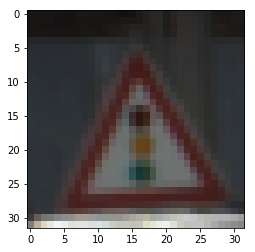

In [9]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

index = 1464

print("%d - %s"%(y_train[index],classes[str(y_train[index])]))
plt.imshow(X_train[index])
plt.show()

In [10]:
# List of class names corresponding to numbers in `y_train`
labels_train = [classes[str(item)] for item in y_train]
print("Example values contained in `labels_train` variable:\n  -%s\n  -%s"%(labels_train[1],labels_train[-1]))

# `X_train` and `labels_train` data zipped together
train_data = list(zip(X_train,labels_train))
print("\n\nExample value contained in `train data` variable':\n",train_data[1])

# Segregating data in training_data by grouping images as per labels.
train_data_segregated = segregate(train_data)

Example values contained in `labels_train` variable:
  -End of no passing
  -Road work


Example value contained in `train data` variable':
 (array([[[28, 24, 24],
        [26, 23, 23],
        [27, 24, 24],
        ..., 
        [31, 28, 26],
        [31, 28, 27],
        [32, 28, 27]],

       [[27, 24, 24],
        [27, 24, 24],
        [28, 25, 24],
        ..., 
        [31, 27, 25],
        [31, 27, 26],
        [33, 29, 27]],

       [[26, 24, 24],
        [26, 24, 24],
        [27, 24, 23],
        ..., 
        [31, 26, 25],
        [31, 27, 26],
        [33, 29, 27]],

       ..., 
       [[28, 25, 23],
        [30, 27, 24],
        [30, 27, 24],
        ..., 
        [27, 24, 22],
        [27, 24, 22],
        [28, 24, 22]],

       [[27, 24, 22],
        [29, 26, 23],
        [31, 26, 24],
        ..., 
        [26, 23, 21],
        [27, 24, 22],
        [28, 25, 23]],

       [[28, 24, 23],
        [28, 24, 22],
        [29, 24, 22],
        ..., 
        [27, 23, 22],
   

Choose from the following options:
  1 for End of no passing
  2 for Wild animals crossing
  3 for Go straight or right
  4 for Traffic signals
  5 for Slippery road
  6 for Speed limit (30km/h)
  7 for Roundabout mandatory
  8 for Bumpy road
  9 for Go straight or left
  10 for Vehicles over 3.5 metric tons prohibited
  11 for Speed limit (60km/h)
  12 for Dangerous curve to the left
  13 for Speed limit (70km/h)
  14 for Right-of-way at the next intersection
  15 for End of no passing by vehicles over 3.5 metric tons
  16 for Speed limit (20km/h)
  17 for End of all speed and passing limits
  18 for Pedestrians
  19 for Bicycles crossing
  20 for Road narrows on the right
  21 for No passing
  22 for Speed limit (80km/h)
  23 for Keep right
  24 for Speed limit (120km/h)
  25 for No passing for vehicles over 3.5 metric tons
  26 for Ahead only
  27 for Turn left ahead
  28 for General caution
  29 for End of speed limit (80km/h)
  30 for Yield
  31 for Speed limit (100km/h)
  32 for 

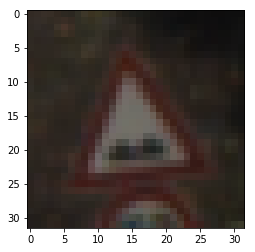

In [8]:
# Visualise images as per labels
show_label_specific(train_data_segregated)

Label:	0 - Speed limit (20km/h)


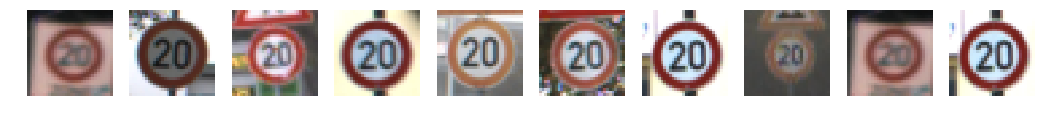

Label:	1 - Speed limit (30km/h)


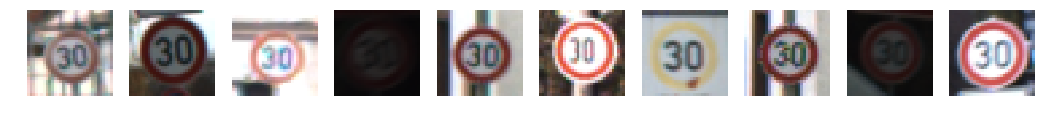

Label:	2 - Speed limit (50km/h)


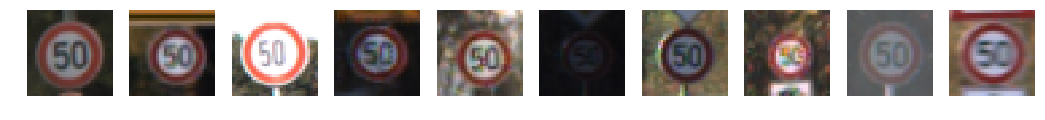

Label:	3 - Speed limit (60km/h)


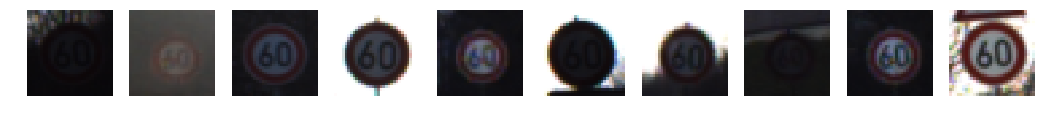

Label:	4 - Speed limit (70km/h)


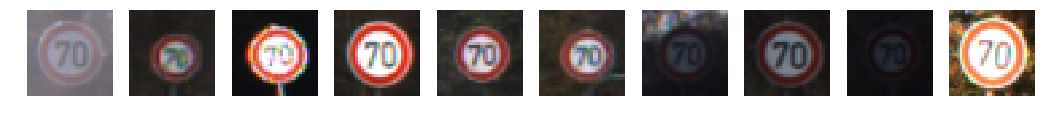

Label:	5 - Speed limit (80km/h)


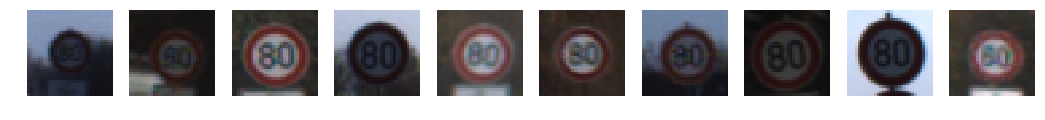

Label:	6 - End of speed limit (80km/h)


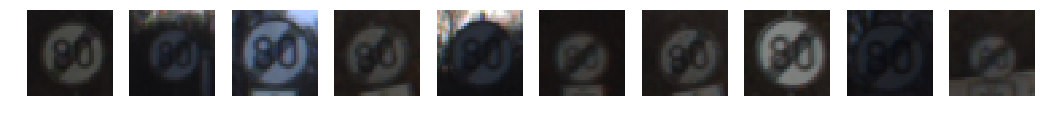

Label:	7 - Speed limit (100km/h)


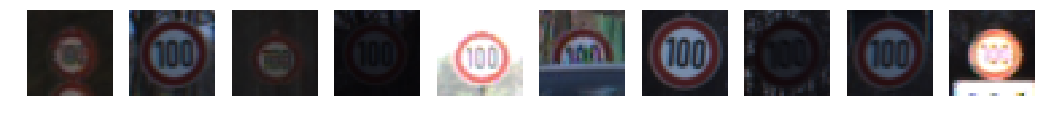

Label:	8 - Speed limit (120km/h)


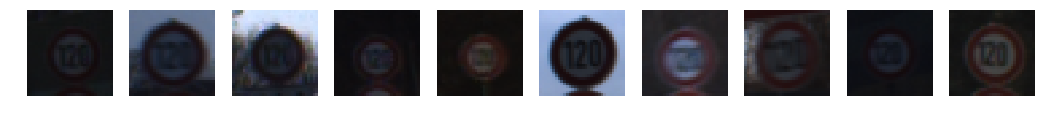

Label:	9 - No passing


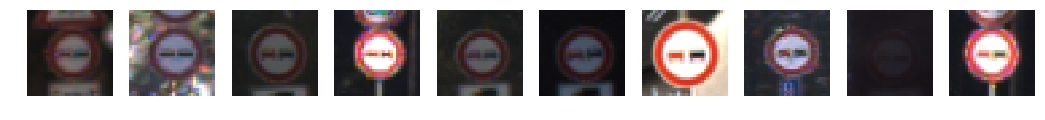

Label:	10 - No passing for vehicles over 3.5 metric tons


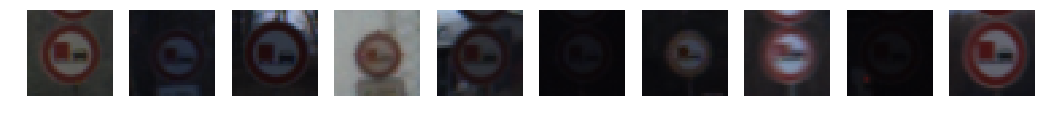

Label:	11 - Right-of-way at the next intersection


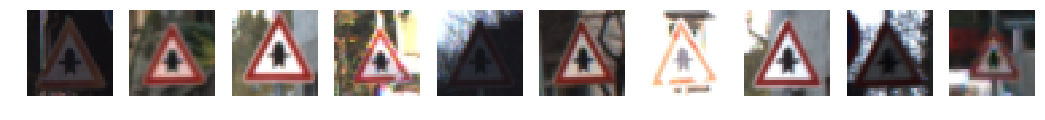

Label:	12 - Priority road


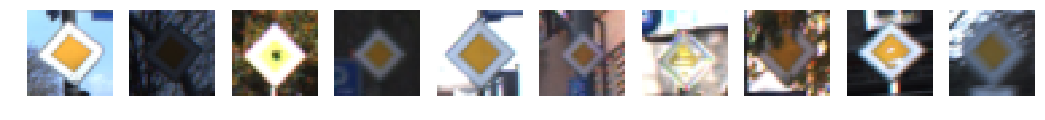

Label:	13 - Yield


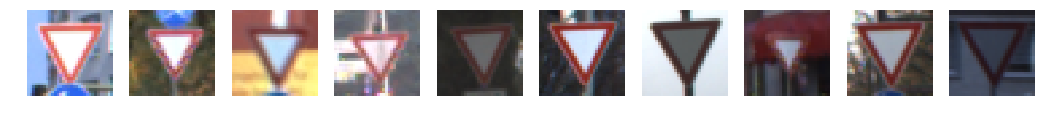

Label:	14 - Stop


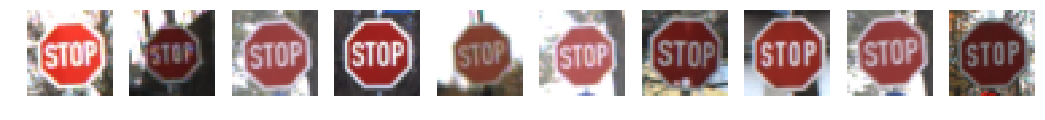

Label:	15 - No vehicles


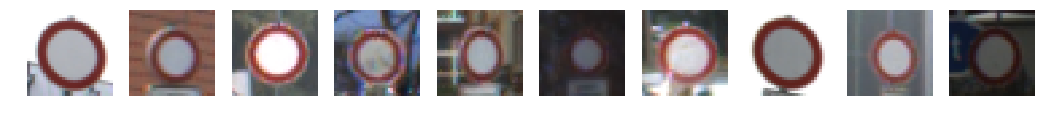

Label:	16 - Vehicles over 3.5 metric tons prohibited


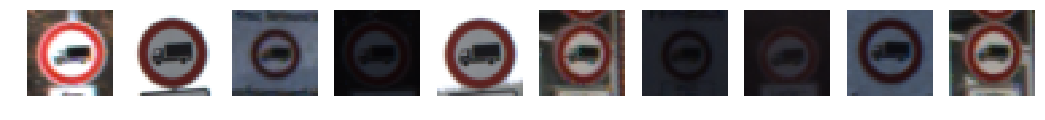

Label:	17 - No entry


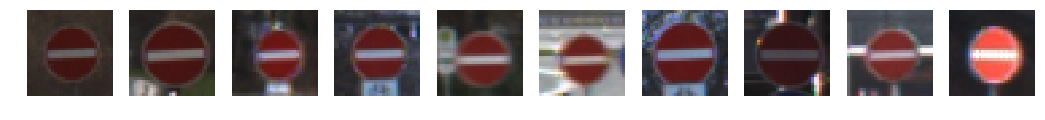

Label:	18 - General caution


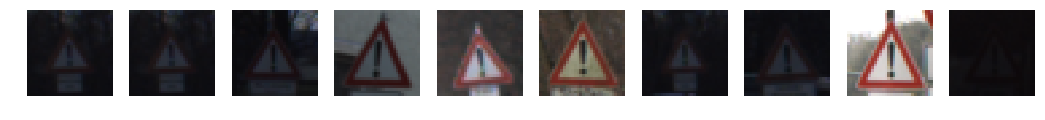

Label:	19 - Dangerous curve to the left


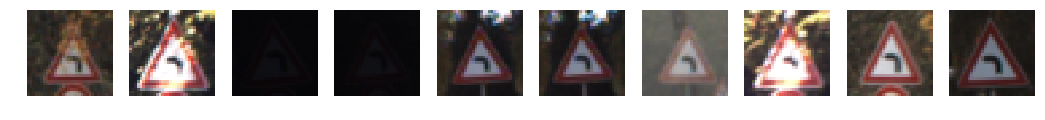

Label:	20 - Dangerous curve to the right


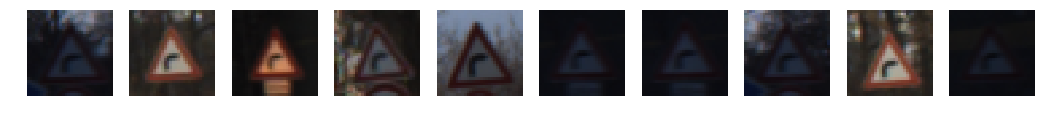

Label:	21 - Double curve


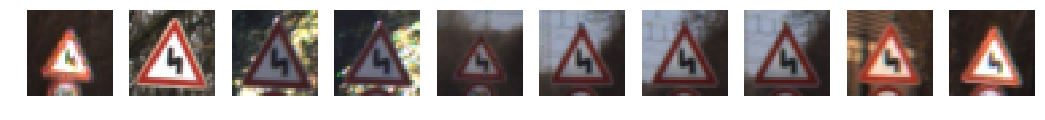

Label:	22 - Bumpy road


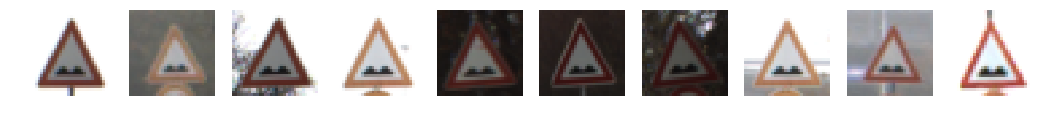

Label:	23 - Slippery road


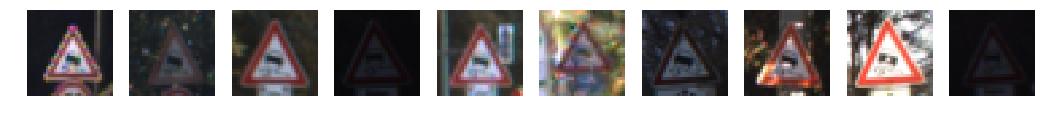

Label:	24 - Road narrows on the right


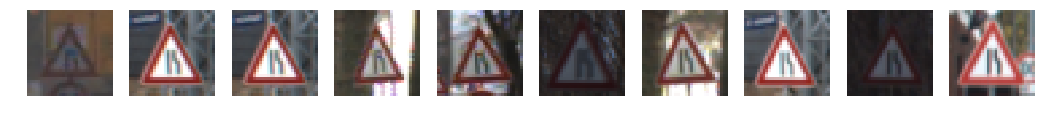

Label:	25 - Road work


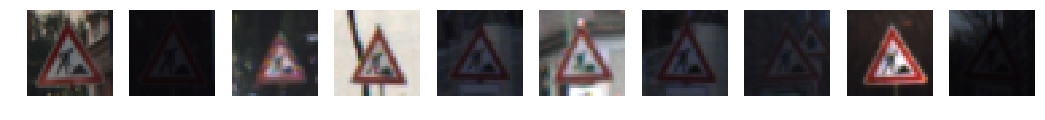

Label:	26 - Traffic signals


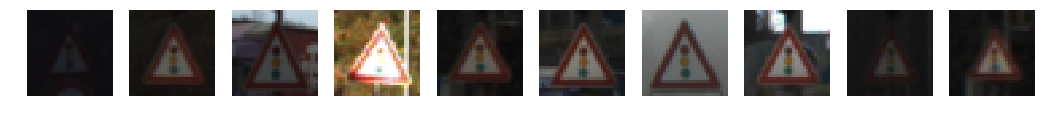

Label:	27 - Pedestrians


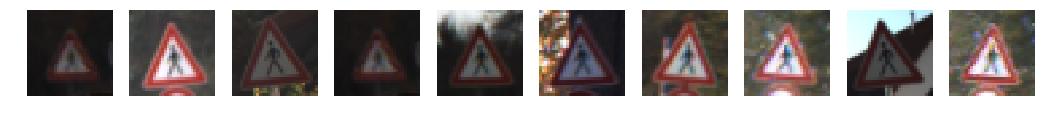

Label:	28 - Children crossing


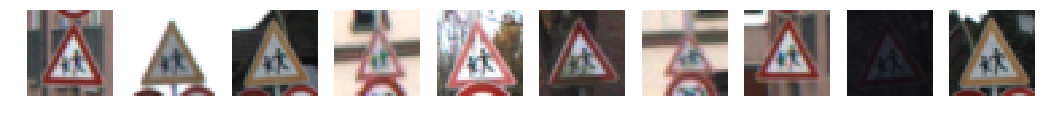

Label:	29 - Bicycles crossing


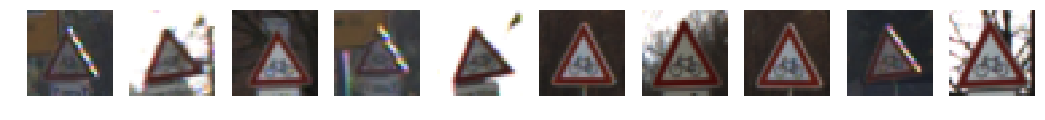

Label:	30 - Beware of ice/snow


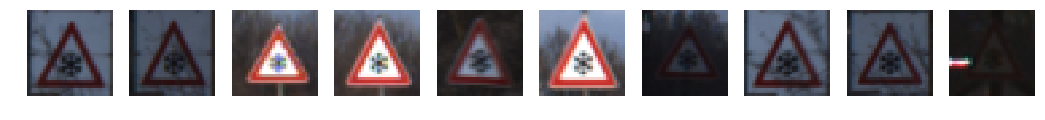

Label:	31 - Wild animals crossing


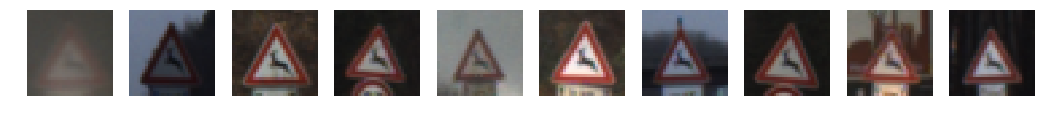

Label:	32 - End of all speed and passing limits


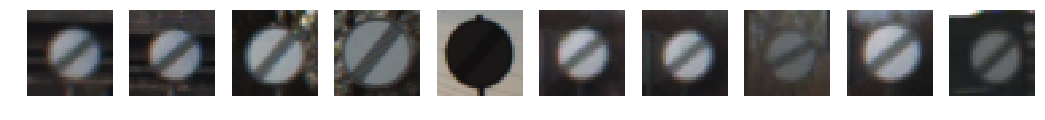

Label:	33 - Turn right ahead


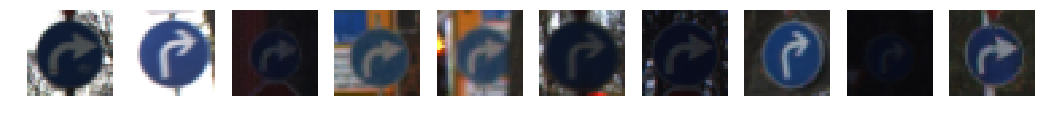

Label:	34 - Turn left ahead


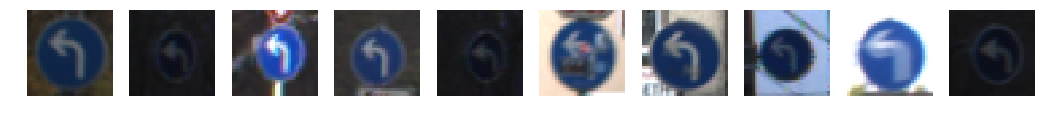

Label:	35 - Ahead only


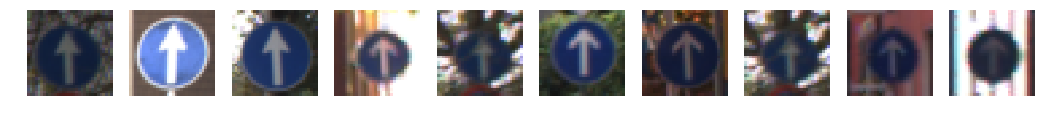

Label:	36 - Go straight or right


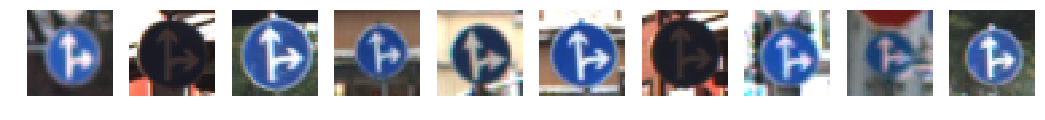

Label:	37 - Go straight or left


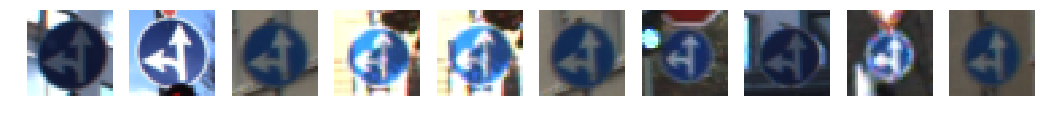

Label:	38 - Keep right


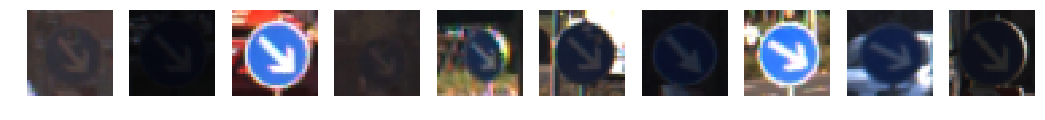

Label:	39 - Keep left


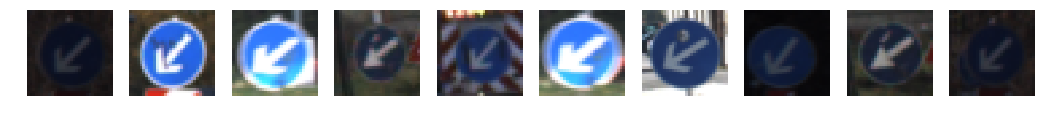

Label:	40 - Roundabout mandatory


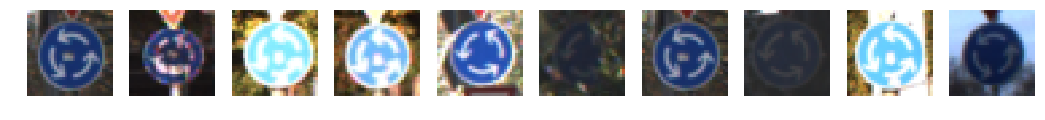

Label:	41 - End of no passing


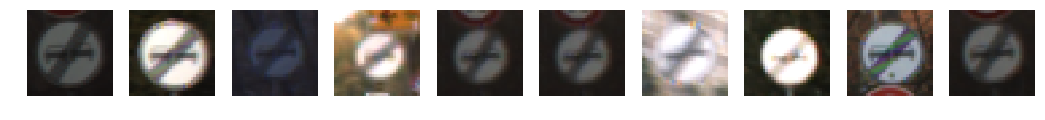

Label:	42 - End of no passing by vehicles over 3.5 metric tons


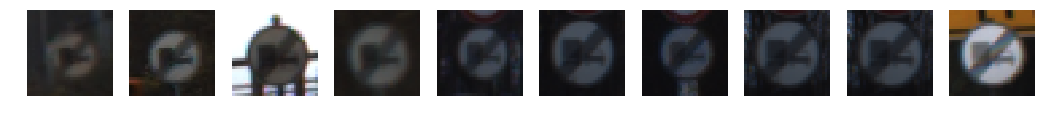

In [9]:
for i in range(n_classes):
    label = str(i)
    label_name = classes[str(i)]

    print("Label:\t%s - %s"%(label,label_name))

    plot_image_set = [train_data_segregated[label_name] \
                      [random.randint(0, len(train_data_segregated[label_name])-1)] \
                       for j in range(20)]

    plot_images(plot_image_set,(1,10),(20,3))

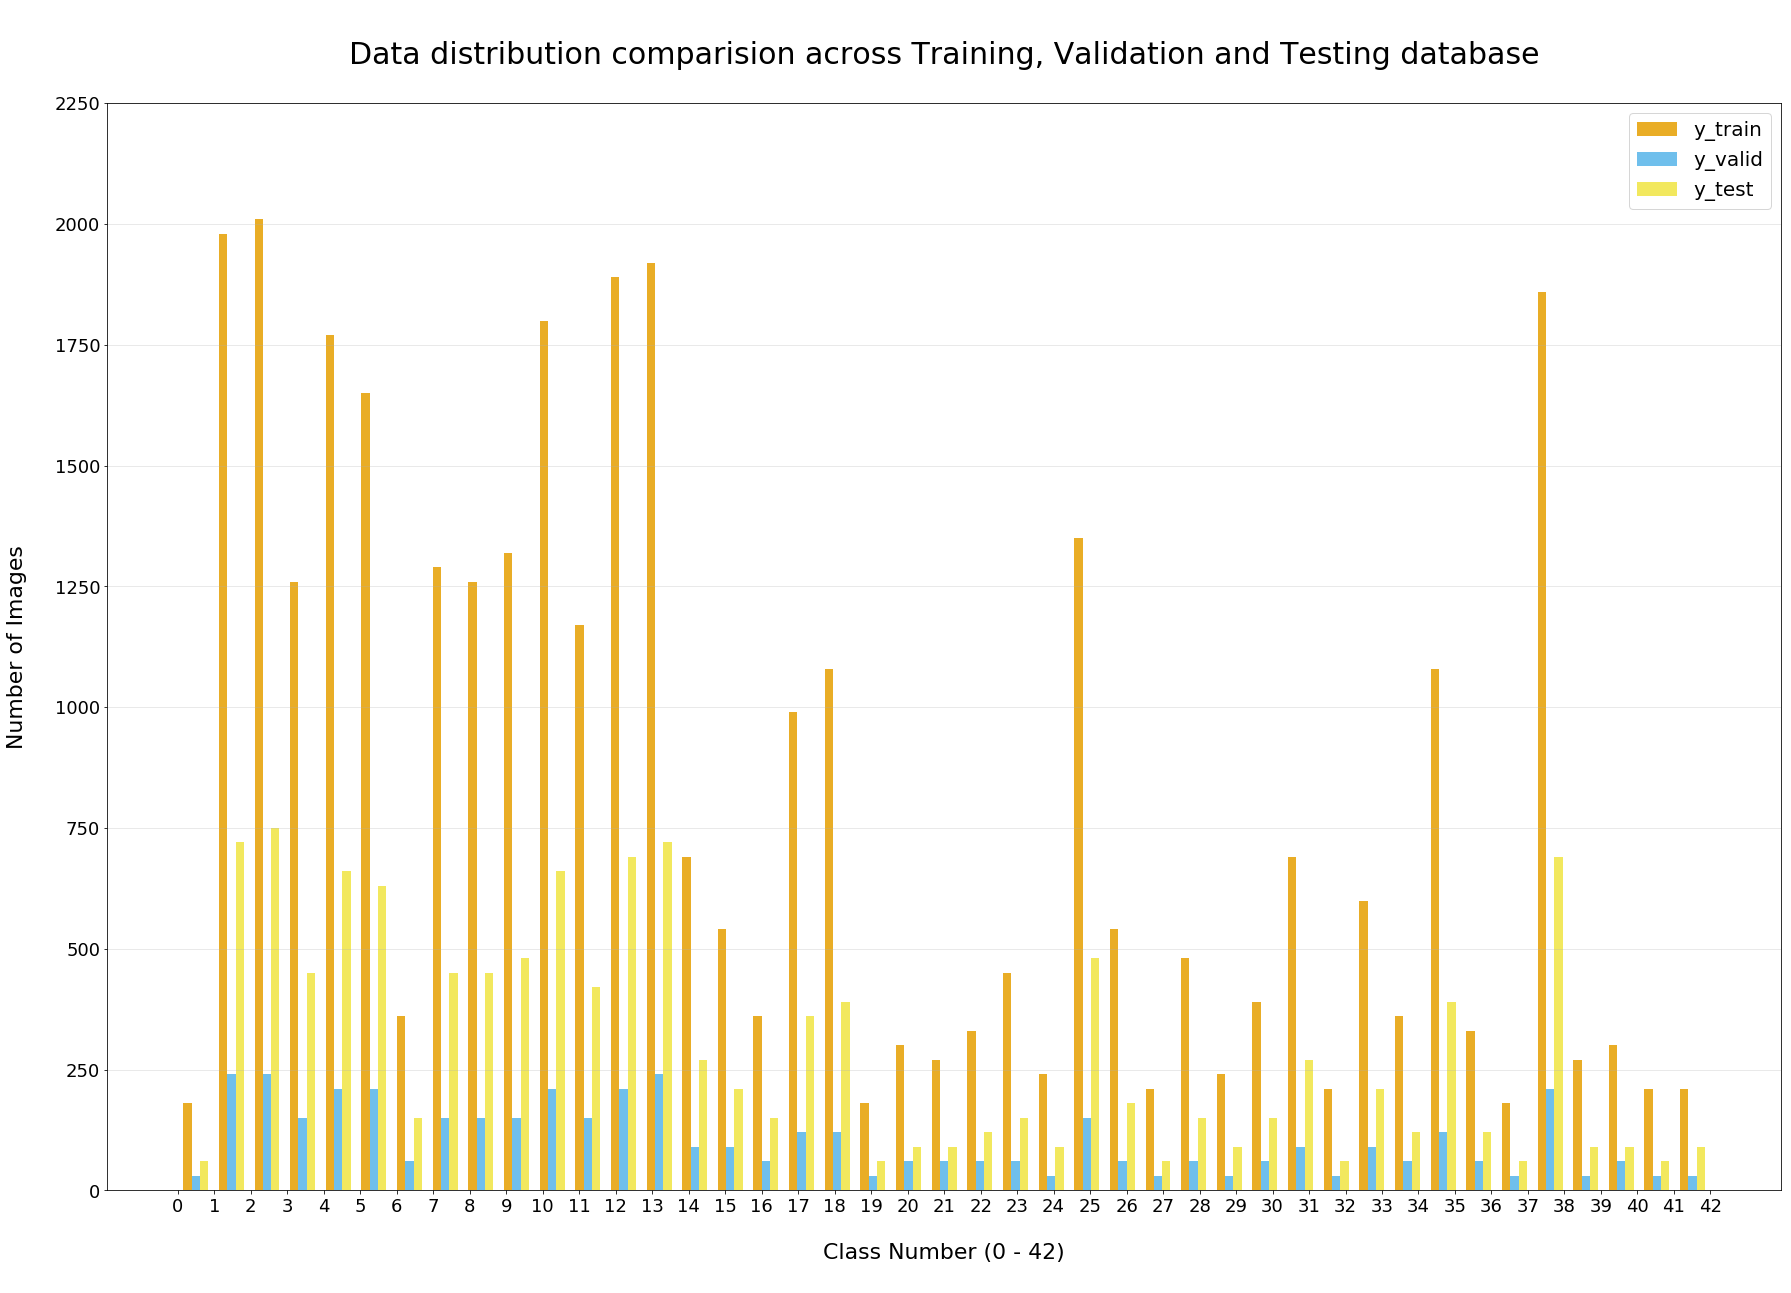

In [10]:
'''HISTOGRAM - DATA VISUALIZATION'''

colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['y_train', 'y_valid', 'y_test']

plt.hist([y_train, y_valid, y_test], bins = n_classes, alpha=0.85, rwidth=0.7, normed=False, \
         color = colors, label = names)

height = 30
width = 20
plt.rcParams["figure.figsize"] = [height,width]

# Plot formatting
plt.grid(axis='y', alpha=0.35)
plt.legend(fontsize = 20)
plt.xlabel('\nClass Number (0 - 42)\n',fontsize = 22)
plt.xticks(np.linspace(0,42,43),fontsize = 18)
plt.ylabel('Number of Images\n',fontsize = 22)
plt.yticks(np.linspace(0,2250,10),fontsize = 18)
plt.title('\nData distribution comparision across Training, Validation and Testing database\n',fontsize = 30)
plt.savefig('output_images/data_distribution_comparision')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### 2.1 Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### 2.1.1 Grayscale Conversion and Normalization

BEFORE Normalization:

1. Training data mean:  82.677589037
2. Validation data mean: 83.5564273756
3. Testing data mean: 82.1484603612


AFTER Normalization:

1. Training data mean:  -0.354081335648
2. Validation data mean: -0.347215411128
3. Testing data mean: -0.358215153428


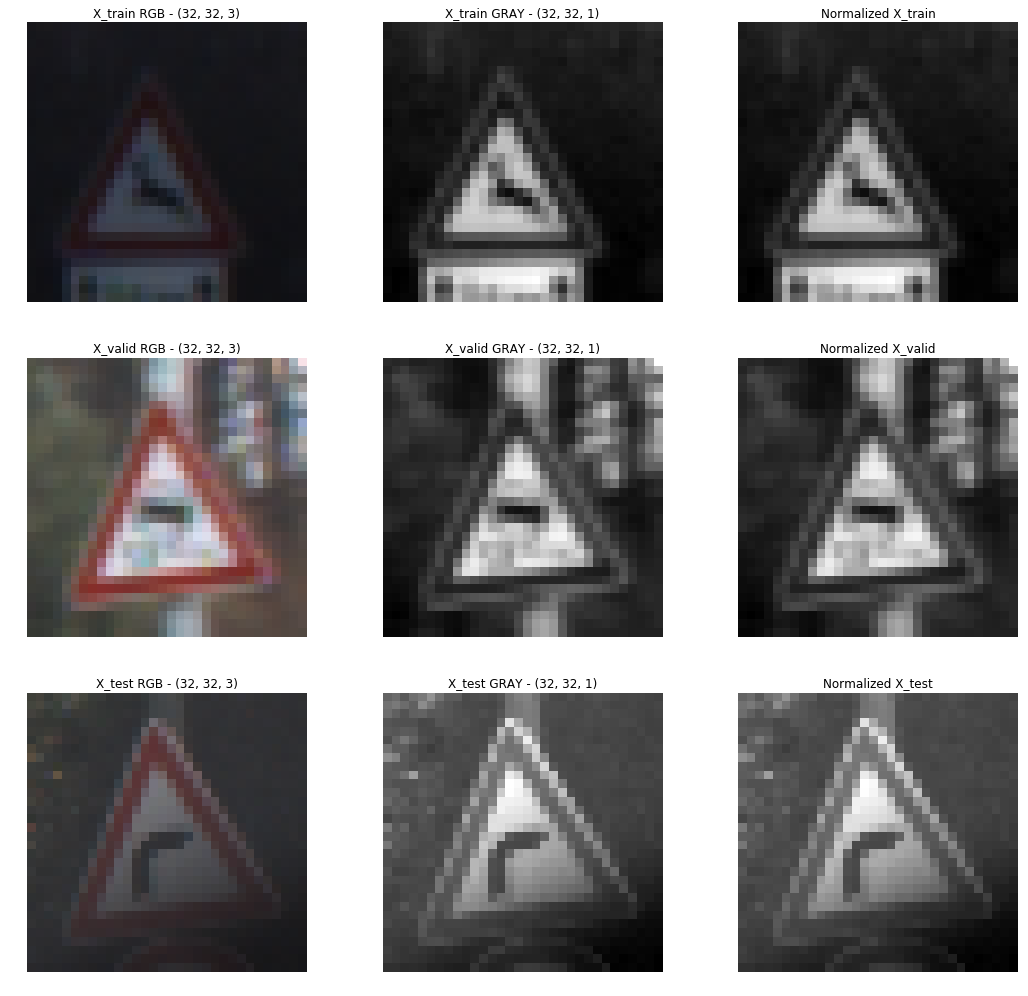

In [11]:
i = 250 #Sample Image

images = [X_train[i], None, None, \
          X_valid[i], None, None, \
          X_test[i], None, None ]

titles = ['X_train RGB - '+str(X_train[i].shape), None, None, \
          'X_valid RGB - '+str(X_valid[i].shape),None, None, \
          'X_test RGB - '+str(X_test[i].shape),None, None]

# GRAYSCALE CONVERSION
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_valid = np.sum(X_valid/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)

images[1] = X_train[i].squeeze()
images[4] = X_valid[i].squeeze()
images[7] = X_test[i].squeeze()

titles[1] = 'X_train GRAY - '+str(X_train[i].shape)
titles[4] = 'X_valid GRAY - '+str(X_valid[i].shape)
titles[7] = 'X_test GRAY - '+str(X_test[i].shape)

print("BEFORE Normalization:\n")
print('1. Training data mean: ',np.mean(X_train))
print('2. Validation data mean:',np.mean(X_valid))
print('3. Testing data mean:',np.mean(X_test))

# NORMALIZING the datasets to (-1,1)
X_train = (X_train - 128)/128
X_valid = (X_valid - 128)/128
X_test = (X_test - 128)/128

print("\n\nAFTER Normalization:\n")
print('1. Training data mean: ',np.mean(X_train))
print('2. Validation data mean:',np.mean(X_valid))
print('3. Testing data mean:',np.mean(X_test))

images[2] = X_train[i].squeeze()
images[5] = X_valid[i].squeeze()
images[8] = X_test[i].squeeze()

titles[2] = 'Normalized X_train'
titles[5] = 'Normalized X_valid'
titles[8] = 'Normalized X_test'

cmap = [None,'gray','gray',None,'gray','gray',None,'gray','gray']
plot_images(images,(3,3),(20,15),titles,cmap,save_plot=0,filepath='output_images/pre-processed_original_data_set')

#### 2.1.2 Data Augmentation

In [12]:
def rand_translate(trans_img):
    rows, cols = trans_img.shape[:2]
    
    #Allows random translation up to +/- px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2) 
    M = np.float32([[1,0,dx],[0,1,dy]])
    trans = cv2.warpAffine(trans_img,M,(cols,rows))
    trans = trans[:,:,np.newaxis]
    return trans

def rand_scale(scale_img):
    rows, cols = scale_img.shape[:2]
    
    point = 2 #Range for Pixel Selection
    # transform limits
    px = np.random.randint(-point,point)
    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    scaled = cv2.warpPerspective(scale_img,M,(rows,cols))
    scaled = scaled[:,:,np.newaxis]
    return scaled

def rand_brighten(grey):
    shifted = grey + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    brighten = shifted * coef - 1
    return brighten

def rand_warp(warp_image):
    rows, cols = warp_image.shape[:2]

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)
    warpped = cv2.warpAffine(warp_image,M,(cols,rows))
    warpped = warpped[:,:,np.newaxis]
    return np.array(warpped)

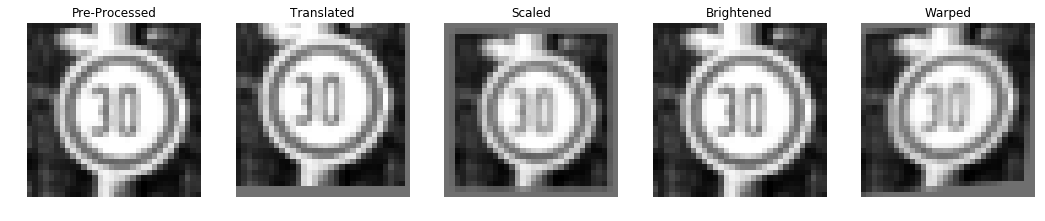

In [13]:
# Testing and Visualization

index = 2444
img = X_train[index]

images = [img.squeeze(),rand_translate(img).squeeze(),rand_scale(img).squeeze(), \
          rand_brighten(img).squeeze(), rand_warp(img).squeeze()]
titles = ['Pre-Processed', 'Translated', 'Scaled', 'Brightened', 'Warped']
cmap = ['gray' for i in range(5)]

plot_images(images,(1,5),(20,5),titles,cmap,save_plot=0,filepath='output_images/transformation_testing_10')

In [14]:
def augment_data(data:dict, labels_data:list, data_set_no:int, data_category:['train','valid'], \
                 limit:['mean','max']):
    
    aug_data_path = "../aug_data/aug_"+data_category+"_"+str(data_set_no)+".p"
    
    if os.path.isfile(aug_data_path):
        return print("File already exists here: ", aug_data_path)
    
    else:
        if type(data_set_no) != int:
            raise TypeError("Argument `data_set_no` should be of integer type")
        if data_set_no <= 0:
            raise ValueError("Argument `data_set_no` should have values greater than `0`")
        if data_category not in ['train','valid']:
            raise ValueError("Valid values for the argument `data_category` are `['train','valid']`")
        
        if type(limit) == int:
            if limit <= 0:
                raise ValueError("Argument `limit` should have values greater than `0`")
        elif limit not in ['mean','max']:
            raise ValueError("Valid values for the argument `limit` are `['mean','max']` or integer values greater than `0`")
        else:
            raise ValueError("Valid values for the argument `limit` are `['mean','max']` or integer values greater than `0`")
        
        print("Augmented Data Generation Initiated...")

        aug_data = []
        aug_labels = []

        bins = np.bincount(labels_data)

        if limit == 'mean':
            target_count = np.mean(bins)
        elif limit == 'max':
            target_count = np.max(bins)
        else:
            target_count = limit

        labels = set(labels_data)
        for label in labels:

            if len(data[label]) < target_count: 
                req_imgs = int(target_count - len(data[label])) #No. of Images required to be generated using augmentation

                for i in range(req_imgs):
                    img = random.choice(data[label])

                    # Generate hot-encoded label with 1 having higher probability like [0,1,1,1] or [1,1,0,0]..etc.
                    translate,scale,brighten,warp = np.random.choice([0,1], 4, p=[0.4, 0.6])
                    sequence = [('translate',translate),('scale',scale),('brighten',brighten),('warp',warp)]

                    # Randomizing the Sequence of Augmentation
                    random.shuffle(sequence)

                    for k in range(4):
                        if sequence[k][0] == 'translate' and sequence[k][1] == 1:
                            img = rand_translate(img)
                        if sequence[k][0] == 'scale' and sequence[k][1] == 1:
                            img = rand_scale(img)
                        if sequence[k][0] == 'brighten' and sequence[k][1] == 1:
                            img = rand_brighten(img)
                        if sequence[k][0] == 'warp' and sequence[k][1] == 1:
                            img = rand_warp(img)

                    aug_data.append(img) #Augmented image added to the database
                    aug_labels.append(label) #Corresponding label added for the augmented image
                
        augmented_data = {'features': aug_data, 'labels': aug_labels}

        with open(aug_data_path, "wb") as f:
            pickle.dump(augmented_data, f)
        print("Generated file can be found here : ",aug_data_path,"\n")
        
    return

In [15]:
#Segregate Pre-processed data as per labels

train_data = list(zip(X_train,y_train))
train_data_segregated = segregate(train_data)

valid_data = list(zip(X_valid,y_valid))
valid_data_segregated = segregate(valid_data)

In [16]:
#Generating Augmented and Validation Training Data
augment_data(train_data_segregated,y_train,2,'train','mean')
augment_data(valid_data_segregated,y_valid, 1, 'valid','max')

File already exists here:  ../aug_data/aug_train_2.p
File already exists here:  ../aug_data/aug_valid_1.p


#### 2.1.2 Data Visualization after Augmentation

In [17]:
aug_X_train, aug_y_train = pickle_load('../aug_data/aug_train_2.p')
aug_X_valid, aug_y_valid = pickle_load('../aug_data/aug_valid_1.p')

Loading Files...
Files Successfully Loaded from:  ../aug_data/aug_train_2.p 

Loading Files...
Files Successfully Loaded from:  ../aug_data/aug_valid_1.p 



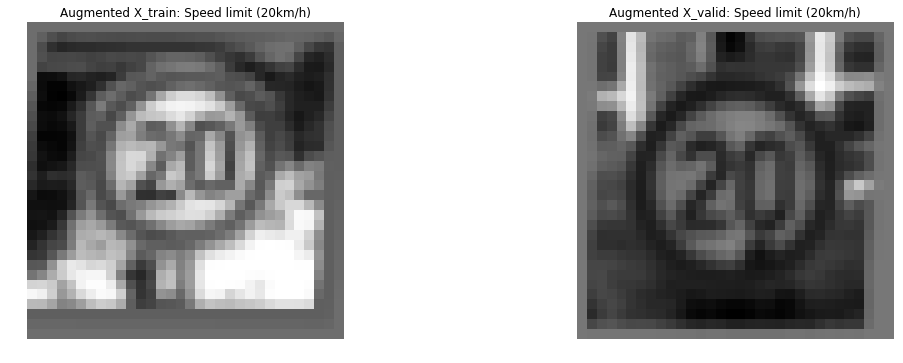

In [18]:
#Visualizing Images from Augmented Data
index = 100

titles = ['Augmented X_train: '+classes[str(aug_y_train[index])],\
          'Augmented X_valid: '+classes[str(aug_y_valid[index])]]
plot_images([aug_X_train[index].squeeze(),aug_X_valid[index].squeeze()],(1,2),(20,5), \
            titles,['gray','gray'],save_plot=0,filepath='output_images/sample_augmented_images')

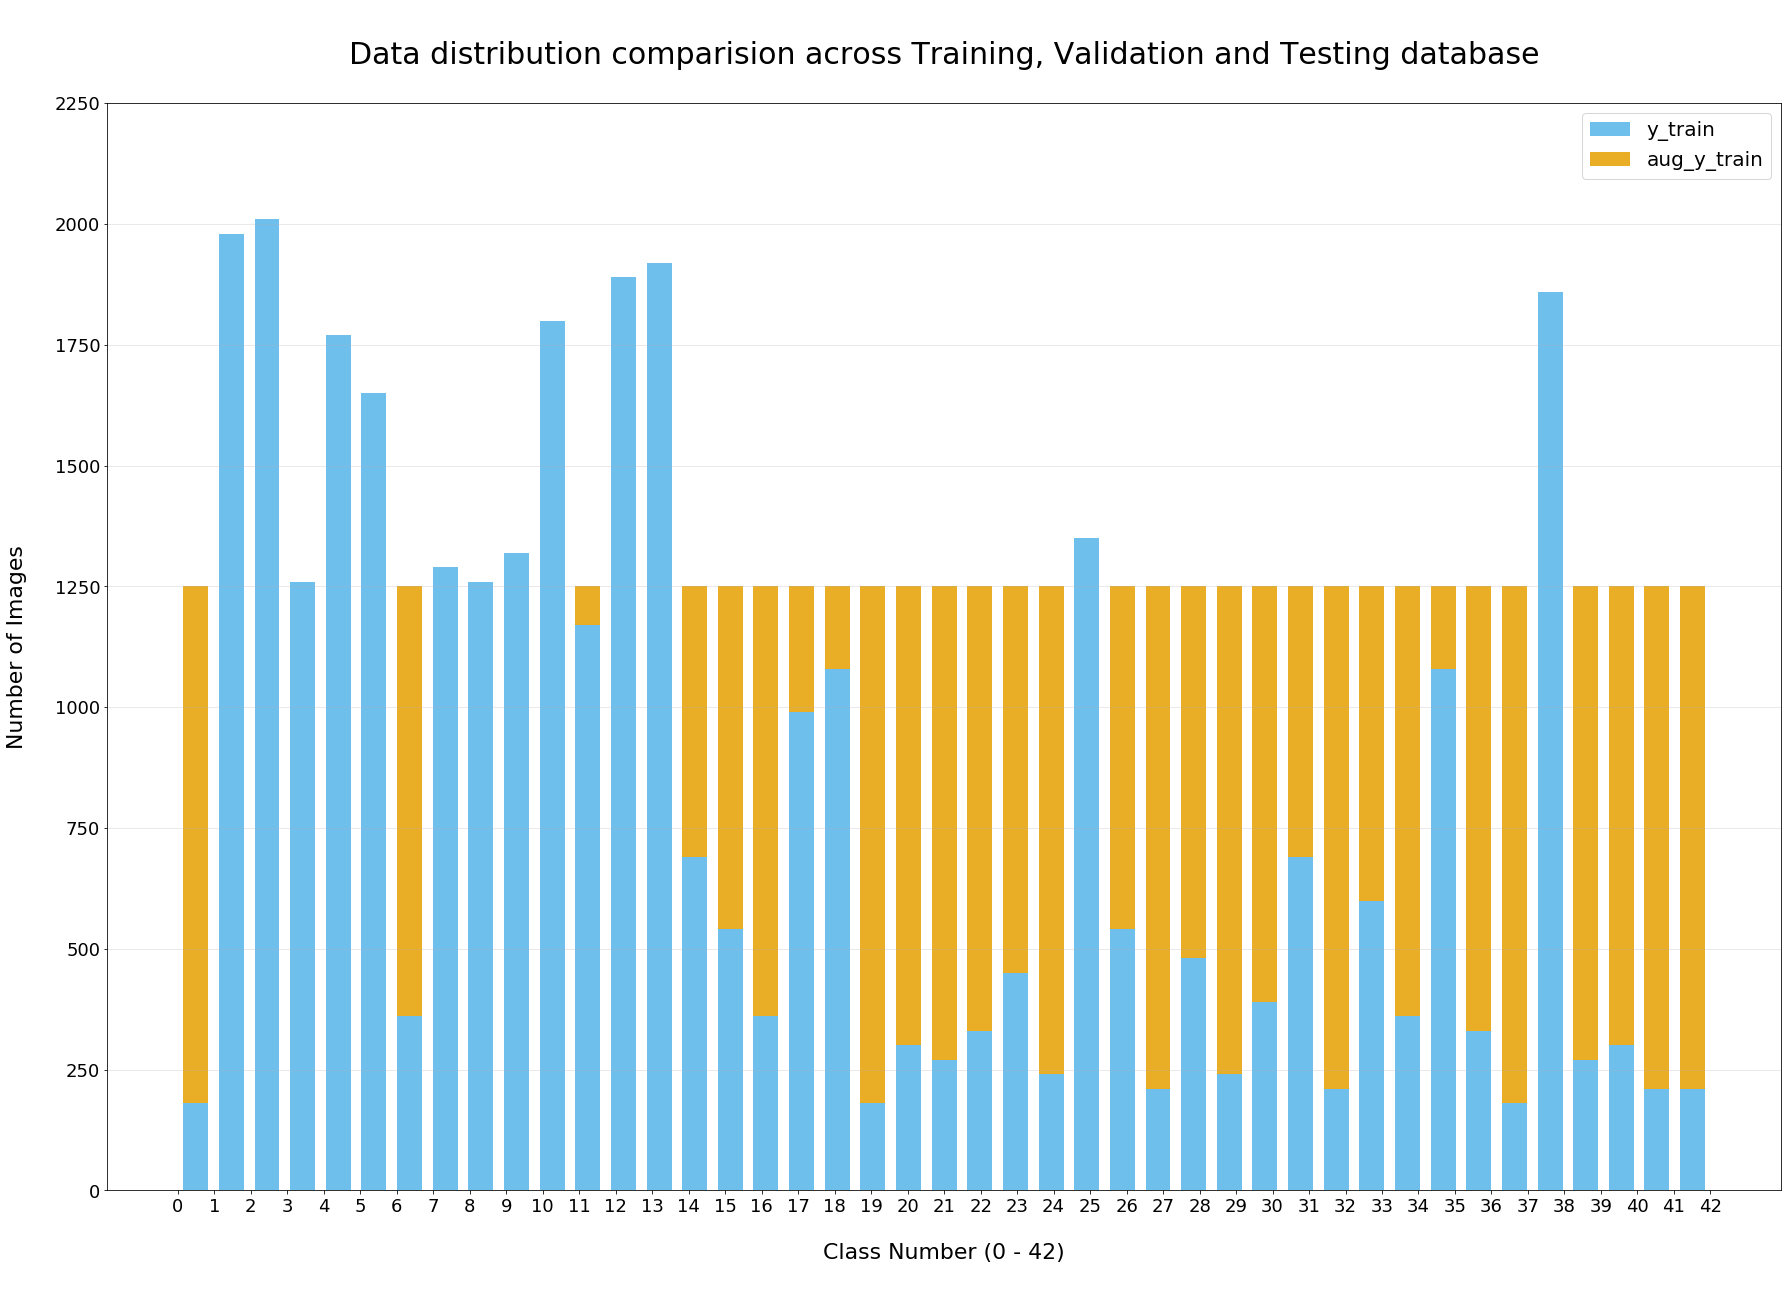

In [20]:
'''HISTOGRAM - DATA VISUALIZATION'''

colors = ['#56B4E9', '#E69F00']
names = ['y_train', 'aug_y_train']

plt.hist([y_train,aug_y_train], bins = n_classes, alpha=0.85, rwidth=0.7, stacked=True,normed=False, \
         color = colors, label = names)

height = 30
width = 20
plt.rcParams["figure.figsize"] = [height,width]

# Plot formatting
plt.grid(axis='y', alpha=0.35)
plt.legend(fontsize = 20)
plt.xlabel('\nClass Number (0 - 42)\n',fontsize = 22)
plt.xticks(np.linspace(0,42,43),fontsize = 18)
plt.ylabel('Number of Images\n',fontsize = 22)
plt.yticks(np.linspace(0,2250,10),fontsize = 18)
plt.title('\nData distribution comparision across Training database\n',fontsize = 30)
plt.savefig('output_images/aug_y_train_2_distribution_comparision')
plt.show()

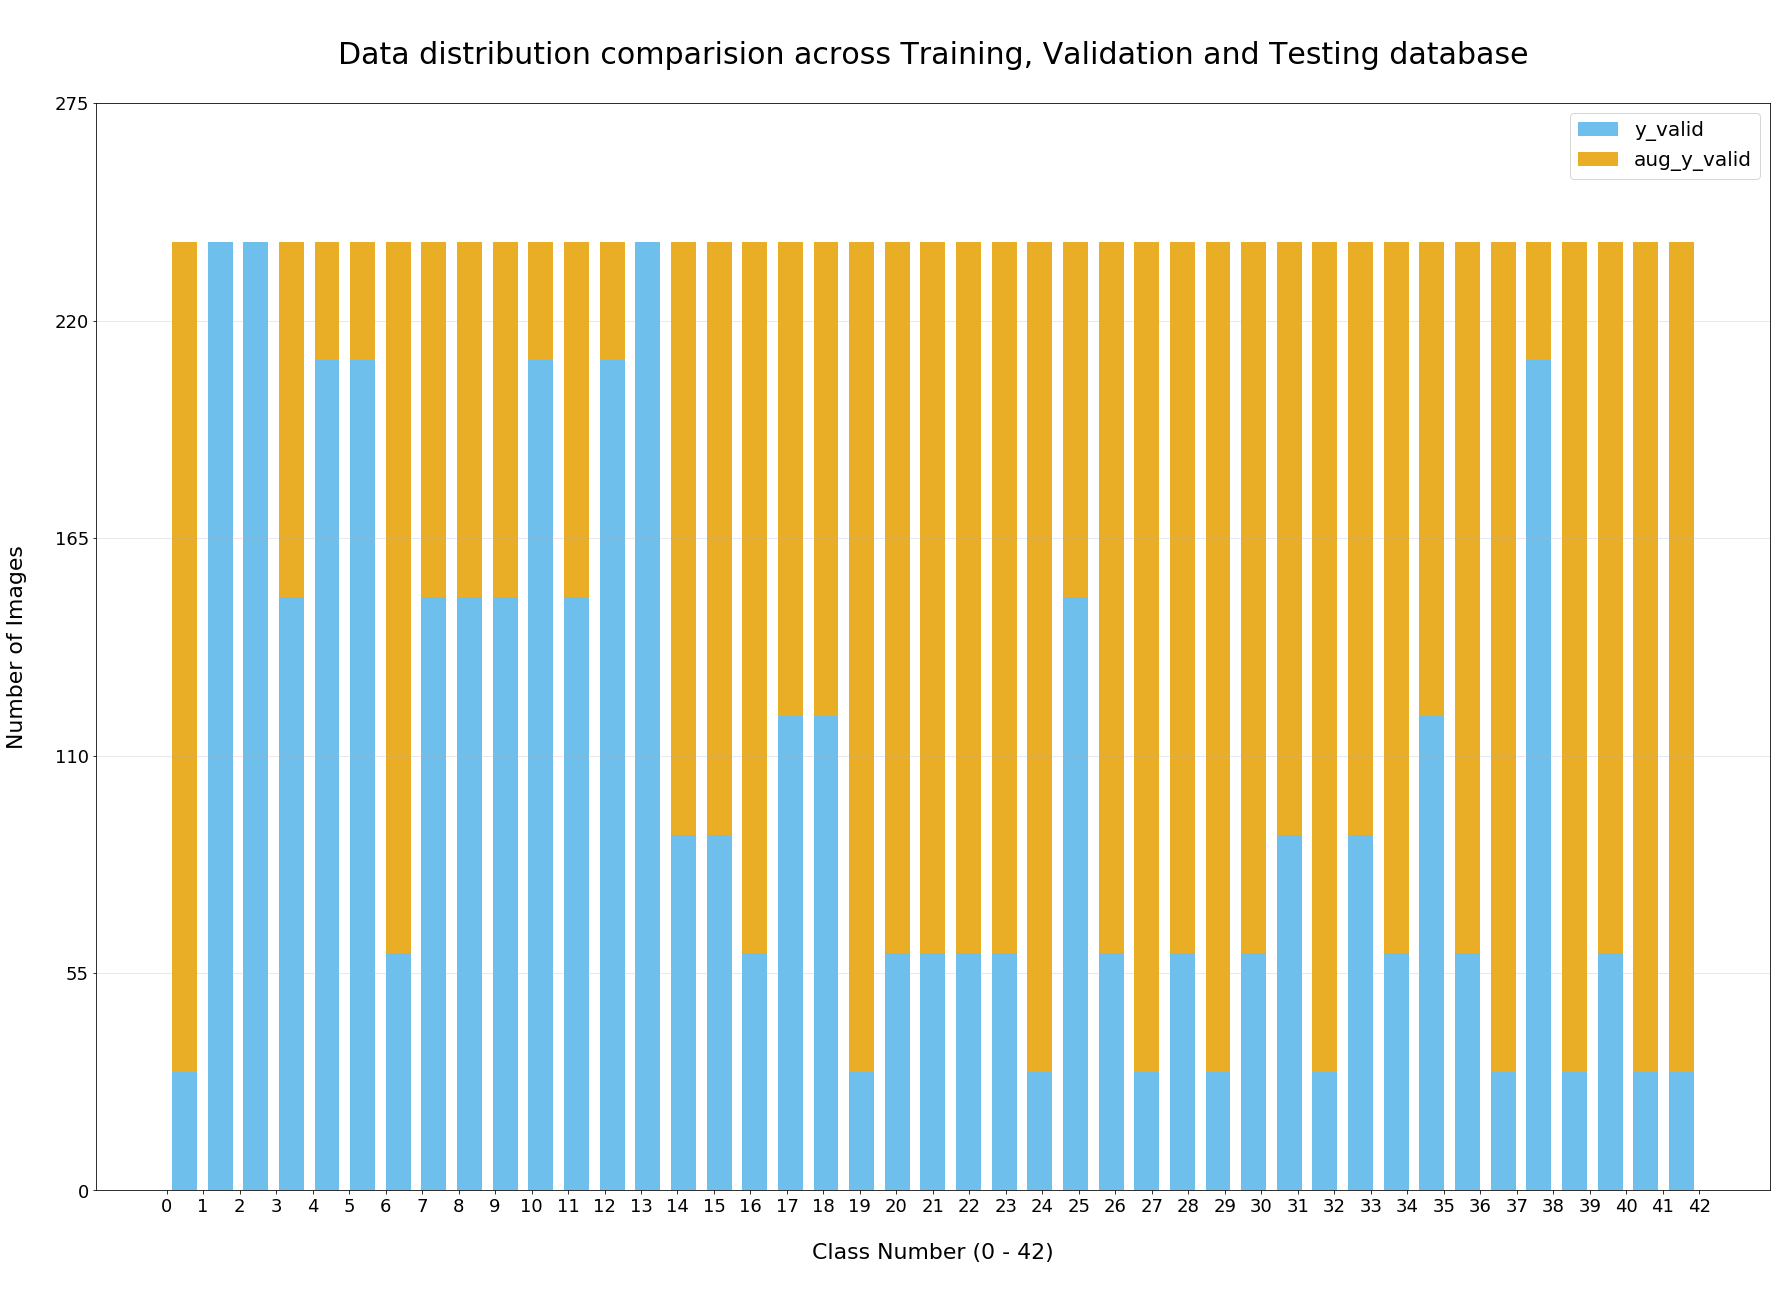

In [21]:
'''HISTOGRAM - DATA VISUALIZATION'''

colors = ['#56B4E9', '#E69F00']
names = ['y_valid', 'aug_y_valid']

plt.hist([y_valid,aug_y_valid], bins = n_classes, alpha=0.85, rwidth=0.7, stacked=True,normed=False, \
         color = colors, label = names)

height = 30
width = 20
plt.rcParams["figure.figsize"] = [height,width]

# Plot formatting
plt.grid(axis='y', alpha=0.35)
plt.legend(fontsize = 20)
plt.xlabel('\nClass Number (0 - 42)\n',fontsize = 22)
plt.xticks(np.linspace(0,42,43),fontsize = 18)
plt.ylabel('Number of Images\n',fontsize = 22)
plt.yticks(np.linspace(0,275,6),fontsize = 18)
plt.title('\nData distribution comparision across Validation database\n',fontsize = 30)
plt.savefig('output_images/aug_y_valid_1_distribution_comparision')
plt.show()

In [22]:
# Concatenating the Augmented data to the orginal dataset before shuffling

concatenate = False

if concatenate == True:
    X_train = np.concatenate((X_train,aug_X_train), axis=0)
    y_train = np.concatenate((y_train,aug_y_train), axis=0)

    X_valid = np.concatenate((X_valid,aug_X_valid), axis=0)
    y_valid = np.concatenate((y_valid,aug_y_valid), axis=0)

#### 2.1.3 Data Shuffling

In [26]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### 2.2 Model Architecture

In [27]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    

    mu = 0
    sigma = 0.1
    output_classes = 43
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x48.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 48), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(48))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Layer 2: Max Pooling. Input = 28x28x48. Output = 14x14x48.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 3: Convolutional. Output = 10x10x96.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 96), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(96))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Layer 4: Max Pooling. Input = 10x10x96. Output = 5x5x96.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 5: Convolutional. Output = 3x3x172.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 172), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros([172]))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)
    
    # Layer 6: Max Pooling. Input = 3x3x172. Output = 2x2x172.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    # Layer 7: Flatten. Input = 2x2x172. Output = 688.
    fc1 = flatten(conv3)
    
    # Layer 8: Fully Connected. Input = 688. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(688 , 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros([84]))
    fc2 = tf.nn.xw_plus_b(fc1, fc2_W, fc2_b)
    
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 9: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, output_classes), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(output_classes))
    logits = tf.nn.xw_plus_b(fc2, fc3_W, fc3_b)
    
    return logits

In [28]:
import tensorflow as tf

tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [29]:
EPOCHS = 100
BATCH_SIZE = 128
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [30]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [31]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.854

EPOCH 2 ...
Validation Accuracy = 0.905

EPOCH 3 ...
Validation Accuracy = 0.927

EPOCH 4 ...
Validation Accuracy = 0.927

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 6 ...
Validation Accuracy = 0.934

EPOCH 7 ...
Validation Accuracy = 0.930

EPOCH 8 ...
Validation Accuracy = 0.936

EPOCH 9 ...
Validation Accuracy = 0.941

EPOCH 10 ...
Validation Accuracy = 0.944

EPOCH 11 ...
Validation Accuracy = 0.951

EPOCH 12 ...
Validation Accuracy = 0.949

EPOCH 13 ...
Validation Accuracy = 0.936

EPOCH 14 ...
Validation Accuracy = 0.944

EPOCH 15 ...
Validation Accuracy = 0.956

EPOCH 16 ...
Validation Accuracy = 0.955

EPOCH 17 ...
Validation Accuracy = 0.959

EPOCH 18 ...
Validation Accuracy = 0.959

EPOCH 19 ...
Validation Accuracy = 0.960

EPOCH 20 ...
Validation Accuracy = 0.960

EPOCH 21 ...
Validation Accuracy = 0.961

EPOCH 22 ...
Validation Accuracy = 0.960

EPOCH 23 ...
Validation Accuracy = 0.961

EPOCH 24 ...
Validation Accura

In [32]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.955


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

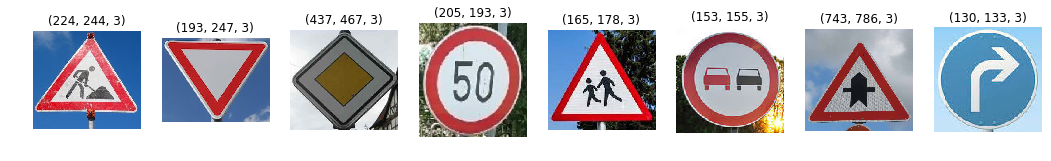

In [33]:
#Loading Sample Test Images I saved from the web

my_test_imgs = []

for path in glob.glob('../my_test_data/*jpg'):
    image = mpimg.imread(path)
    my_test_imgs.append(image)

titles = [np.shape(img) for img in my_test_imgs]
plot_images(my_test_imgs,(1,8),(20,3),titles,save_plot=1,filepath='output_images/sample_unedited_test_images')

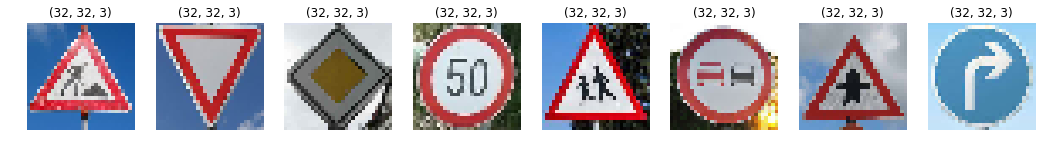

In [34]:
#Resizing Images to 32x32x3

my_test_imgs = [cv2.resize(image,(32,32)) for image in my_test_imgs]
titles = [np.shape(img) for img in my_test_imgs]
plot_images(my_test_imgs,(1,8),(20,3),titles,save_plot=1,filepath='output_images/sample_resized_test_images')

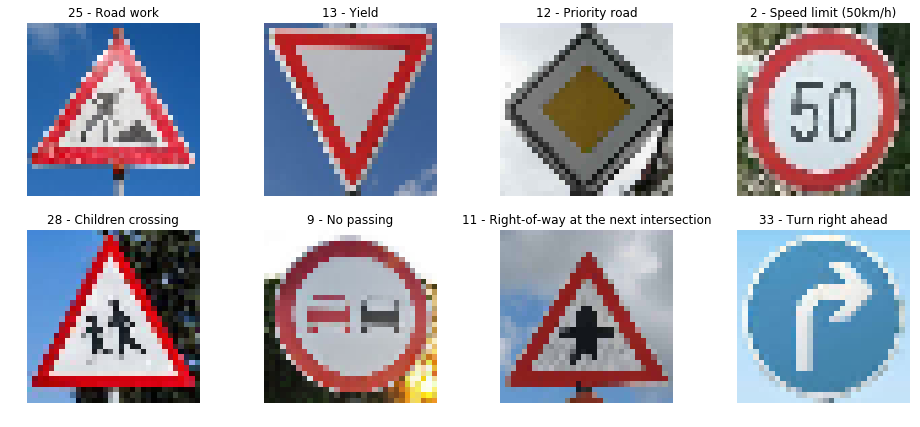

In [35]:
#Labelling the Images

my_test_labels = [25,13,12,2,28,9,11,33]
titles = [ str(label)+" - "+classes[str(label)] for label in my_test_labels]
plot_images(my_test_imgs,(2,4),(18,6),titles,save_plot=1,filepath='output_images/sample_labelled_test_images')

### Predict the Sign Type for Each Image

In [36]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

BEFORE Normalization:
1. Training data mean:  139.160481771


AFTER Normalization:
1. Training data mean:  0.0871912638346


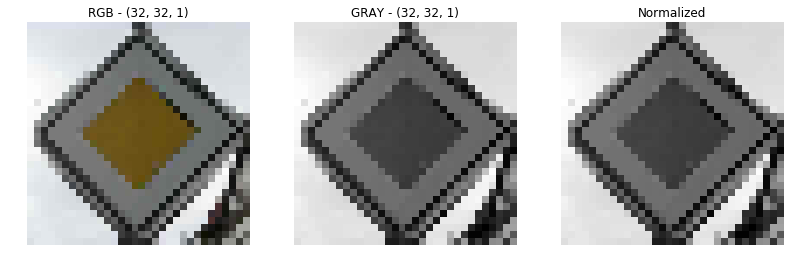

In [37]:
i = 2 #Sample Image
my_test_imgs = np.array(my_test_imgs)

images = [my_test_imgs[i], None, None]
titles = ['RGB - '+str(X_train[i].shape), None, None]

# GRAYSCALE CONVERSION
my_test_imgs = np.sum(my_test_imgs/3, axis=3, keepdims=True)

images[1] = my_test_imgs[i].squeeze()
titles[1] = 'GRAY - '+str(my_test_imgs[i].shape)

print("BEFORE Normalization:")
print('1. Training data mean: ',np.mean(my_test_imgs))

# NORMALIZING the datasets to (-1,1)
my_test_imgs = (my_test_imgs - 128)/128

print("\n\nAFTER Normalization:")
print('1. Training data mean: ',np.mean(my_test_imgs))

images[2] = my_test_imgs[i].squeeze()
titles[2] = 'Normalized'

cmap = [None,'gray','gray']
plot_images(images,(1,3),(15,5),titles,cmap,save_plot=1,filepath='output_images/sample_pre-processed_test_image')

### Analyze Performance

In [38]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver1 = tf.train.import_meta_graph('./lenet.meta')
    saver1.restore(sess, "./lenet")
    
    my_accuracy = evaluate(my_test_imgs, my_test_labels)
    print("My Sample Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
My Sample Test Set Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


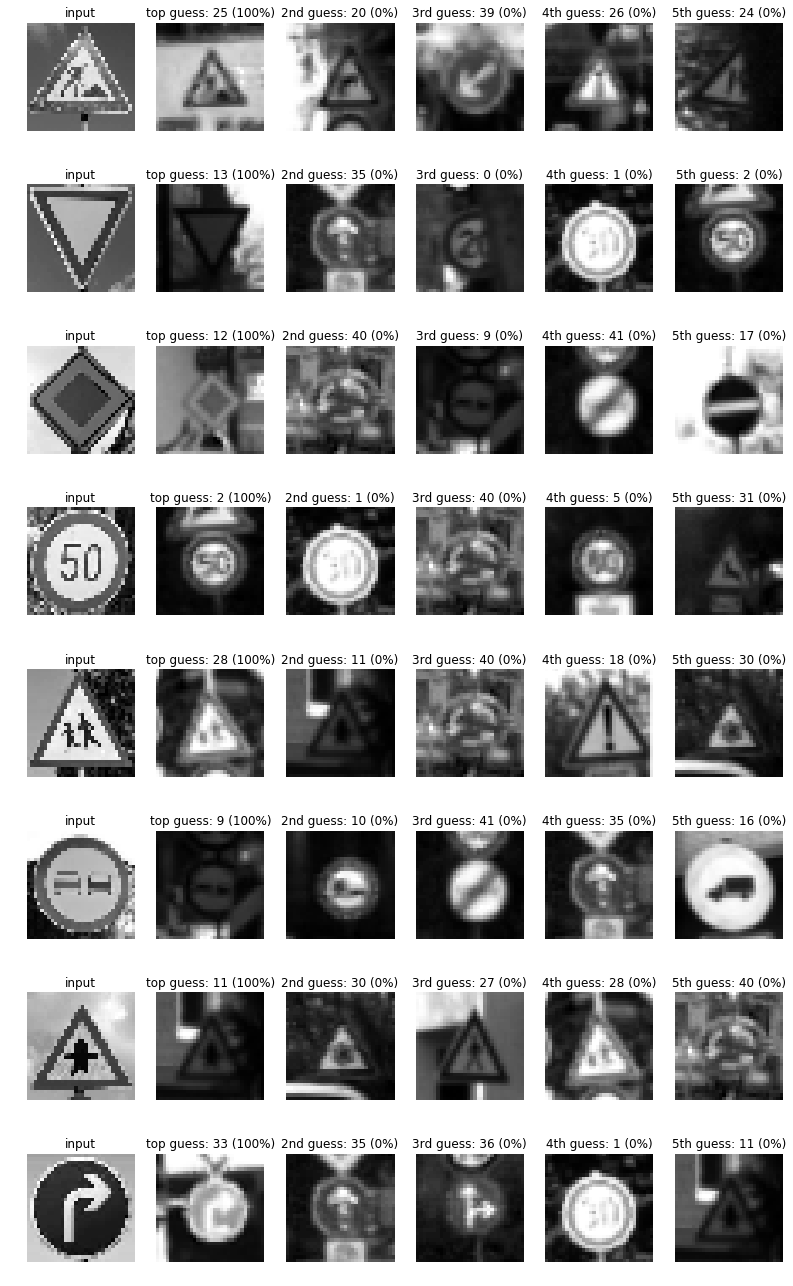

In [39]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_test_imgs, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_test_imgs, keep_prob: 1.0})

    images = []
    titles = []
    cmap = []
    
    for i, image in enumerate(my_test_imgs):
        images.append(image.squeeze())
        titles.append('input')
        cmap.append('gray')
      
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        images.append(X_valid[index1].squeeze())
        titles.append('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        cmap.append('gray')
        
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        images.append(X_valid[index2].squeeze())
        titles.append('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        cmap.append('gray')
        
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        images.append(X_valid[index3].squeeze())
        titles.append('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
        cmap.append('gray')
        
        guess4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_valid == guess4)[0]
        images.append(X_valid[index4].squeeze())
        titles.append('4th guess: {} ({:.0f}%)'.format(guess4, 100*my_top_k[0][i][3]))
        cmap.append('gray')
        
        guess5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_valid == guess5)[0]
        images.append(X_valid[index5].squeeze())
        titles.append('5th guess: {} ({:.0f}%)'.format(guess5, 100*my_top_k[0][i][4]))
        cmap.append('gray')
    
    plot_images(images,(8,6),(15,20),titles,cmap,save_plot=1,filepath='output_images/softmax_probabilities_visualization')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")